# Home Assignment No. 2 - part two

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


## Task 6. Deep ANNs. (3 points)

-  **(1 pt.)** Activation functions; **(sub tasks 6.1)**
-  **(2 pt.)** MNIST classification.  **(sub tasks 6.2)**



### Task 6.1  Activation functions. 
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch implementation and their derivatives using [autograd](https://pytorch.org/docs/stable/autograd.html) functionality `grad()`:
   
1. Plot `ReLU`, `ELU` ($\alpha = 1$), `Softplus` ($\beta = 1$) and `Sign`, `Sigmoid`, `Softsign`, `Tanh`.


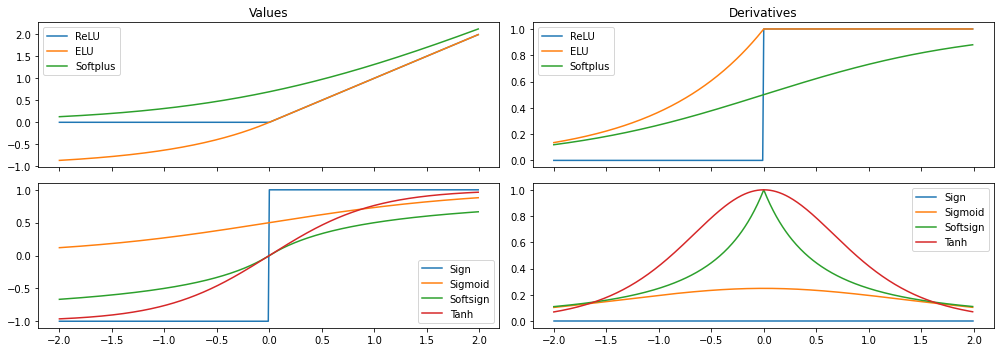

In [11]:
%matplotlib inline
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch

x = torch.arange(-2, 2, .01, requires_grad=True)
x_np = x.detach().numpy()
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(14, 5))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution

            axes[i, 0].plot(x_np, activation(x).detach().numpy(), label=function_name)
            axes[i, 1].plot(x_np, torch.autograd.grad(inputs=x, outputs=activation(x).sum())[0], label=function_name)
            if i == 0:
              axes[i,0].set_title('Values')
              axes[i,1].set_title('Derivatives')

        ### END Solution

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Which of these functions may be, and which - definitely, are a poor choise as an activation function in a neural network? Why? Do not forget that output of the current layer servers as an input for the following one. Imagine a situation where we have many layers, what happens with the activation values?







In [ ]:
# BEGIN SOLUTION (do not delete this comment!)


# *   ReLU will always give us 0 gradient, if inputs are <=0, which will lead to no training. So if we use it somewhere closser to the end of NN, it will lead to no training for
# all previous neurons (if grad = 0), which is bad.
# *   ELU it solves the problem of zero gradient, that ReLu has, but it is more computationally expensive, due to exponent in the formula.
# *   Softplus computationally expensive, cause none of neurons will be droped out (as, e.g., ReLU does)
# *   Sign has zero gradient for all inputs, so it will not change connected neurons during backpropogation -> no training.
# *   Sigmoid has very small gradient and for very small or very large values it's almost 0, which can lead to slow convergence to the accurate prediction or 
# even stop of training process.
# *   Tanh has the same problems, as sigmoid - small gradients for very small and very high input values.

#END SOLUTION (do not delete this comment!)

### Task 6.2 MNIST classification. 

At one of the seminars we have discussed an MLP (Multilayer perceptron) with one hidden layer, logistic activation functions and softmax. In this task, you are to:

1. Implement the MLP modules, including the Softmax cross entropy between `logits` and `labels` using numpy.

2.  Train your numpy realization of MLP to classify the MNIST from `sklearn.datasets()`. The required accuracy on validation is `> 90%`.

3.  Compare the acccuracy of classification to your scores from `Part 1` with and without dimensionality reduction. Is this comparison fair?:) Derive the confusion matrix for all digits classes. Which digits are predicted better or worse than others, why?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# fetch the dataset.
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]
test_size = digits_test.shape[0]

input_size = 8*8
classes_n = 10

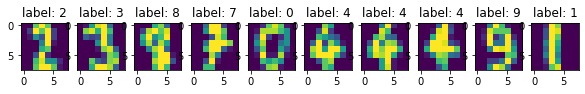

In [ ]:
N = 10

sample_idx = np.random.choice(1797, N, replace=False)
digits_sample = digits[sample_idx]
targets_sample = targets[sample_idx]
f, ax  = plt.subplots(1,10, figsize=(10, 5))

for i in range(N):
    ax[i].imshow(digits_sample[i].reshape(8,8))
    ax[i].set_title('label: '+str(targets_sample[i]))


A short recap on what we are going to achieve here.
<br>
1. Forward pass:
$$
h_1 = X\theta_1+\beta_1
$$

$$
O_1 = sig(h_1)
$$

$$
h_2 = O_1\theta_2+\beta_2
$$
$$
O_2 = softmax(h_2)
$$
$$
Loss = CrossEntropy(O_2, true \space labels)
$$

2. Compute gradients: 

To update weights first we need to compute loss gradients with respect to $\theta_1$ and $\theta_2$ and then update both $\theta$ and $\beta$.

$$
\frac{ \partial{loss} }{\partial{\theta_2}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{\theta_2}}
$$
Note, that $\frac{ \partial{h_2} }{\partial{\theta_2}}=O_1$, so we can cache this value during forward pass to speed up our computation.
$$
\frac{ \partial{loss} }{\partial{\theta_1}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{O_1}}\frac{ \partial{O_1} }{\partial{h_1}}\frac{ \partial{h_1} }{\partial{\theta_1}}
$$
Note, that $\frac{ \partial{h_1} }{\partial{\theta_1}}=X$.

Since we are using sigmoid avtivation function here and
$$
\frac{ \partial{sig} }{\partial{h}} = sig(h)(1 - sig(h))
$$
It also makes sense to cache sig(h) during forward pass.

3. Update weights:

$\theta:= \theta -  \frac{ \partial{loss} }{\partial{\theta}}\alpha$, where $\alpha$ is some learning rate.

Note, it was not shown here how to update and compute $\beta$ but you can do it!

### Implement the MLP with backprop

In [ ]:
### YOUR TASK STARTS HERE ###

#Here you should implement by yourself MLP class and its constituents including forward and backward propagation methods

class Linear:
    def __init__(self, input_size, output_size):
        # Trainable parameters of the layer and their gradients
        self.thetas = np.random.randn(input_size, output_size) # the weight matrix of the layer (W)
        self.thetas_grads = np.empty_like(self.thetas) # gradient w.r.t. the weight matrix of the layer
        self.bias = np.random.randn(output_size) # bias terms of the layer (b)
        self.bias_grads = np.empty_like(self.bias) # gradient w.r.t. bias terms of the linear layer

    def forward(self, x): 
        # keep x for backward computation
        self.x = x
        output = np.matmul(x, self.thetas) + self.bias
        return output
    
    def backward(self, output_grad, learning_rate):
        """
        Calculate and return gradient of the loss w.r.t. the input of linear layer given the input x and the gradient 
        w.r.t output of linear layer. You should also calculate and update gradients of layer parameters.
        :param x: np.array, input tensor for linear layer;
        :param output_grad: np.array, grad tensor w.r.t output of linear layer;
        :return: np.array, grad w.r.t input of linear layer
        """
        
        # BEGIN SOLUTION (do not delete this comment!)

        input_grad = np.matmul(output_grad, self.thetas.T)
        self.thetas_grads = np.matmul(self.x.T, output_grad)
        self.bias_grads = np.sum(output_grad, axis=0)#in our case, when batch_size = 1, output_grad.reshape(-1) will work the same, but for bigger batches, I guess, sum along axis
        #will work universally (while reshape(-1) won't)

        # END Solution (do not delete this comment!)
        
        return input_grad

    def step(self, learning_rate):
        self.thetas -= self.thetas_grads * learning_rate
        self.bias -= self.bias_grads * learning_rate

class LogisticActivation:
    def __init__(self):
        # the layer has no parameters
        pass 
        
    def sig(self, x):
        return 1/(1 + np.exp(-x))

    def forward(self, x):
        # keep o for backward computation
        self.o = self.sig(x)
        return self.o 


    def backward(self,  output_grad, learning_rate=None):
        """
        Calculate and return the gradient of the loss w.r.t. the input
        of logistic non-linearity (given input x and the gradient 
        w.r.t output of logistic non-linearity).
        
        :param x: np.array, input tensor for logistic non-linearity;
        :param output_grad: np.array, grad tensor w.r.t output of logistic non-linearity;
        :return: np.array, grad w.r.t input of logistic non-linearity
        
        """
        
       # BEGIN SOLUTION (do not delete this comment!)

        input_grad = output_grad * self.o * (1-self.o)

        ### END Solution (do not delete this comment!)
        
        return input_grad


class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        h1 = self.linear1.forward(x)
        h1a = self.activation1.forward(h1)
        out = self.linear2.forward(h1a)
        return out

    def backward(self, output_grad, learning_rate):
        """
        Calculate and return the gradient of the loss w.r.t. the input of MLP given the input and the gradient 
        w.r.t output of MLP. You should also update gradients of paramerters of MLP layers.
        Hint - you should chain backward operations of modules you have already implemented. You may also
        need to calculate intermediate forward results.
        
        :param x: np.array, input tensor for MLP;
        :param output_grad: np.array, grad tensor w.r.t output of MLP;
        :return: np.array, grad w.r.t input of MLP
        """
 
        # BEGIN SOLUTION (do not delete this comment!)

        grad_1 = self.linear2.backward(output_grad, learning_rate)
        grad_2 = self.activation1.backward(grad_1, learning_rate)
        out = self.linear1.backward(grad_2, learning_rate)

        # END Solution (do not delete this comment!)
        

        return  out


In [ ]:
# BEGIN SOLUTION (do not delete this comment!)

def softmax_crossentropy_with_logits(logits, reference_answers): 

    loss = -logits[:, reference_answers] + np.log(np.exp(logits).sum())#https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
    loss = loss.sum()
    
    ### END Solution
    return loss

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    
    #Taking the derivative of loss function, we get exp(x_i)/np.sum(exp(x)) (which is softmax) for every element and -1 for those, who are in reference answers
    from scipy.special import softmax
    grad = softmax(logits)
    grad[:, reference_answers] -= 1

    return grad # >>> your solution here <<<


# BEGIN Solution

In [ ]:
np.random.seed(42)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 100
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-2

for epoch in range(epochs_n):
    
    y_pred = []

    for sample_i in range(train_size):
        x = x_train[sample_i].reshape((1, -1))
        target = np.array([y_train[sample_i]])
        

        ### BEGIN Solution
        
        # ... perform forward pass and compute the loss
        logits = mlp.forward(x)
        loss = softmax_crossentropy_with_logits(logits, target)
        # ... compute the gradients w.r.t. the input of softmax layer
        grad = grad_softmax_crossentropy_with_logits(logits, target)
        # ... perform backward pass
        mlp.backward(grad, learning_rate)
        # ... and update the weights with weight -= grad * learning_rate
        mlp.linear2.step(learning_rate)
        mlp.linear1.step(learning_rate)
        
        ### END Solution

        y_pred.extend(logits.argmax(1))

    if epoch % 10 == 0:
        
        y_pred_test = []

        for sample_i in range(test_size):
            x = x_test[sample_i].reshape((1, -1))
            target = np.array([y_test[sample_i]])
            
            logits = mlp.forward(x)
            y_pred_test.extend(logits.argmax(1))

        print('Starting epoch {}'.format(epoch), \
              ', Loss : {:.3}'.format(loss), \
              ', Accuracy on train: {:.3}'.format(accuracy_score(y_train, y_pred)), \
              ', Accuracy on test: {:.3}'.format(accuracy_score(y_test, y_pred_test)) )
        


Starting epoch 0 , Loss : 2.71 , Accuracy on train: 0.103 , Accuracy on test: 0.0667
Starting epoch 10 , Loss : 2.15 , Accuracy on train: 0.625 , Accuracy on test: 0.649
Starting epoch 20 , Loss : 1.55 , Accuracy on train: 0.821 , Accuracy on test: 0.807
Starting epoch 30 , Loss : 1.07 , Accuracy on train: 0.875 , Accuracy on test: 0.871
Starting epoch 40 , Loss : 0.742 , Accuracy on train: 0.9 , Accuracy on test: 0.889
Starting epoch 50 , Loss : 0.534 , Accuracy on train: 0.911 , Accuracy on test: 0.904
Starting epoch 60 , Loss : 0.399 , Accuracy on train: 0.92 , Accuracy on test: 0.924
Starting epoch 70 , Loss : 0.308 , Accuracy on train: 0.927 , Accuracy on test: 0.931
Starting epoch 80 , Loss : 0.245 , Accuracy on train: 0.929 , Accuracy on test: 0.931
Starting epoch 90 , Loss : 0.198 , Accuracy on train: 0.936 , Accuracy on test: 0.933


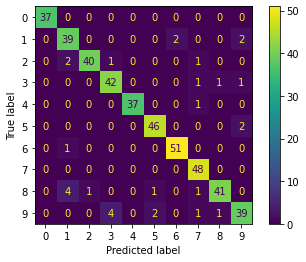

In [ ]:
# BEGIN SOLUTION (do not delete this comment!)
     
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=np.arange(classes_n))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(classes_n))
disp.plot();

#Most mistakes (5 in sum) our NN does, taking 9 for 3 and vice versa. This handwritten figures are quite similar (small arc difference on the left), it depends on persons handwriting
#Same for 9 and 5 (4 mistakes in sum). The differ by small ars on the right, so some humans miswritings might take place.
#As for confusing with 8 and 1 (4 times) and other pairs, I guess it's just unrepresentative objects or again handwritten mistakes (but pretty strong and strange to my mind ^_^)

# END Solution (do not delete this comment!)

## Task 7. Autoencoders on tabular data (2 points)
**From now on we will be using pytorch for all the tasks.**

We will build a latent representation for tabular data with simple Autoencoder (AE). We are going to work with the cancer dataset from scikit-learn package. You are to follow the instructions.  

1. **(1 pt.)**  Implement AE modules for tabular data. Train AE to get latent representation of the cancer dataset from `sklearn.datasets()`. Use `MSE` loss and get < $0.3$ on validation, with AE "bottleneck" = $2$;   **(sub tasks 7.1 - 7.5)**

2. **(1 pt.)** Plot the latent representation of whole dataset in 2D, use colors to show object of different classes. **(sub tasks: 7.6)**


In [1]:
# imports

import torch
import torch.nn as nn
import torch.utils.data as torch_data

import sklearn.datasets as sk_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#Fixing seed
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True


#### 7.1 Fetch the data. Scale it and split on train and test.

In [2]:

cancer_dset = sk_data.load_breast_cancer()

X_train, X_val, y_train, y_val = train_test_split(cancer_dset['data'], cancer_dset['target'], test_size=0.2, random_state=42)
print('\nTrain size: ', len(X_train))
print('Validation size: ', len(X_val))

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

print('Features: ', list(cancer_dset['feature_names']))
print('\nShape:', X_train.shape)




Train size:  455
Validation size:  114
Features:  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Shape: (455, 30)


#### 7.2 Let us firstly create the dataset, which we'll be able to use with pytorch dataloader. 
Implement `__len__` and `__getitem__` methods.

In [3]:
### BEGIN Solution

class CancerData(torch_data.Dataset):
    def __init__(self, X, y):
        super(CancerData, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):

        return len(self.X)
    
    def __getitem__(self, idx):
        
        
        return self.X[idx, :], self.y[idx]


### END Solution

In [4]:
train_dset = CancerData(X_train, y_train) 
val_dset = CancerData(X_val, y_val) 

print(train_dset[5])

(tensor([ 0.1196,  1.9607,  0.1995,  0.0125,  1.3055,  1.0662,  0.9448,  0.6670,
         1.7919,  1.1127, -0.1132, -0.3136,  0.0100, -0.1594, -0.4526,  0.9020,
         0.4543, -0.1581, -0.2454,  0.5911,  0.2549,  1.9137,  0.5098,  0.1168,
         1.5730,  2.6153,  2.0462,  0.8738,  2.0814,  2.8176]), tensor(0.))


#### 7.3 Now, we'll make a base class for our autoencoder. 
AE takes as input encoder and decoder (it will be two neural networks). Your task is to implement the forward pass.

In [5]:
class MyFirstAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(MyFirstAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, x):
        """
        Take a mini-batch as an input, encode it to the latent space and decode back to the original space
        x_out = decoder(encoder(x))
        :param x: torch.tensor, (MB, x_dim)
        :return: torch.tensor, (MB, x_dim)
        """
        # BEGIN SOLUTION (do not delete this comment!)

        x = self.decoder(self.encoder(x))

        # END Solution (do not delete this comment!)
        
        return x

#### It is high time to create encoder and decoder neural networks!
Make hidden size of the network to be equal to `2`.

**Hint.** You can use `nn.Sequential` to create your own archtectures.

In [6]:
encoder = lambda bottleneck : nn.Sequential(
                        # >>> your solution here <<<
                        #I added lambda bottleneck, cause the function didn't get any input params (but you give it 2 as input further)
                        nn.Linear(X_train.shape[1], 20),#20 is random
                        #nn.BatchNorm1d(20),#Including Batchnorms gave worth results
                        nn.LeakyReLU(),
                        nn.Linear(20, bottleneck)
                        )  

decoder = lambda bottleneck : nn.Sequential(
                        # >>> your solution here <<<
                        #I added lambda bottleneck, cause the function didn't get any input params (but you give it 2 as input further)
                        nn.Linear(bottleneck, 20),
                        #nn.BatchNorm1d(20),
                        nn.LeakyReLU(),
                        nn.Linear(20, X_train.shape[1])
                        )

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = MyFirstAE(encoder(2), decoder(2))  
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
scheduler = torch.optim.lr_scheduler.ExponentialLR(
    optimizer=optimizer, 
    gamma=0.95)


train_loader = torch_data.DataLoader(train_dset, batch_size=50, shuffle=True) 
val_loader = torch_data.DataLoader(val_dset, batch_size=200, shuffle=False) 

#### 7.4 Implement the missing parts of the `train` function

In [8]:
def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, save_dir=None):
    
    freq = max(epochs//20,1)
    net.to(device)
    
    for epoch in range(1, epochs+1):
        net.train()

        losses_train = []
        for X, _ in train_loader:
            
            ### BEGIN Solution

            # Perform one step of minibatch stochastic gradient descent
            
            # >>> your solution here <<<
            X = X.to(device)

            optimizer.zero_grad()
            
            pred = net.forward(X)
            loss = criterion(pred, X)#As we train autoencoder, X is both input and target
            loss.backward()
            
            losses_train.append(loss.item())

            optimizer.step()
            

        # define NN evaluation, i.e. turn off dropouts, batchnorms, etc.
        net.eval()
        losses_val = []##I moved it outside 'for', because in other case it will be overwritten every step
        for X, _ in val_loader:
            #losses_val = []
            
            
            # Compute the validation loss

            # >>> your solution here <<<
            X = X.to(device)

            pred = net.forward(X)
            loss = criterion(pred, X)
            losses_val.append(loss.item())

            ### END Solution

        if scheduler is not None:
            scheduler.step()
        
        if verbose and epoch%freq==0:
            mean_val = sum(losses_val)/len(losses_val)
            mean_train = sum(losses_train)/len(losses_train)

            print('Epoch {}/{} || Loss:  Train {:.4f} | Validation {:.4f}'\
                  .format(epoch, epochs, mean_train, mean_val))

#### 7.5 Train your AE on breast cancer dataset. 
Your goal is to get validation error <0.3.

Some features that may help you to improve the performance:
* `Dropout`
* `Batchnorm`
* lr scheduler
* Batch size increase/decrease

In [9]:
# for `MSE` loss get < 0.3 on validation, with AE "bottleneck" = 2
train(100, net, criterion, optimizer, train_loader, val_loader, scheduler) 

Epoch 5/100 || Loss:  Train 0.3889 | Validation 0.3338
Epoch 10/100 || Loss:  Train 0.3180 | Validation 0.3196
Epoch 15/100 || Loss:  Train 0.3204 | Validation 0.3153
Epoch 20/100 || Loss:  Train 0.3008 | Validation 0.3117
Epoch 25/100 || Loss:  Train 0.3148 | Validation 0.3193
Epoch 30/100 || Loss:  Train 0.2796 | Validation 0.3046
Epoch 35/100 || Loss:  Train 0.2871 | Validation 0.3057
Epoch 40/100 || Loss:  Train 0.3061 | Validation 0.3025
Epoch 45/100 || Loss:  Train 0.2739 | Validation 0.3034
Epoch 50/100 || Loss:  Train 0.2911 | Validation 0.3027
Epoch 55/100 || Loss:  Train 0.2689 | Validation 0.2996
Epoch 60/100 || Loss:  Train 0.2826 | Validation 0.3003
Epoch 65/100 || Loss:  Train 0.2706 | Validation 0.2986
Epoch 70/100 || Loss:  Train 0.2749 | Validation 0.2984
Epoch 75/100 || Loss:  Train 0.2735 | Validation 0.2982
Epoch 80/100 || Loss:  Train 0.2725 | Validation 0.2978
Epoch 85/100 || Loss:  Train 0.3000 | Validation 0.2981
Epoch 90/100 || Loss:  Train 0.2804 | Validation 

#### 7.5 Let us take a look at the latent space. 
Encode the whole dataset, using your AE, plot it in 2D and use colors to indicate objects of differrent classes

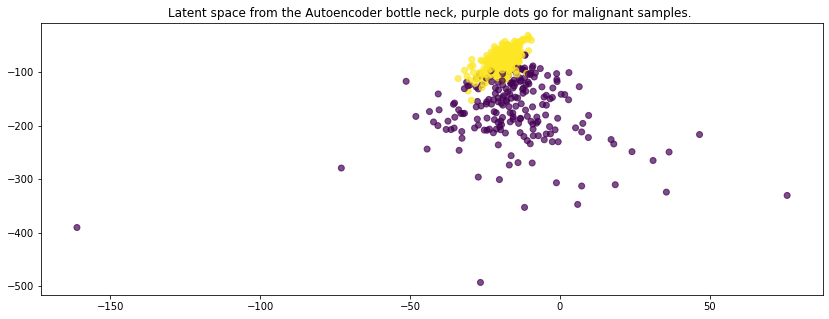

In [14]:
 ### BEGIN Solution
plt.figure(figsize=(14, 5))
net.eval()
torch_data = torch.tensor(cancer_dset.data, dtype=torch.float32)
enc = net.encoder(torch_data).detach().numpy()# >>> your solution here <<<
# enc = net.encoder(torch.Tensor(torch_data).to(device)).cpu().detach().numpy()#if use GPU
plt.scatter(enc[:,0], enc[:,1], c=cancer_dset['target'], alpha=0.7);
plt.title('Latent space from the Autoencoder bottle neck, purple dots go for malignant samples. ');
 ### END Solution

### Task 8.  Autoencoder on kMNIST. (2 points)


We will build a latent representation for `kMNIST` dataset by using our AE.

1. **(1 pt.)**  Train AE to get latent representation of the `kMNIST` dataset from `sklearn.datasets()`. Follow the instructions. Use `MSE` loss and obtain < $0.035$ on validation, with AE "bottleneck"  $\leq 40$; **(sub tasks 8.1 - 8.2)**
2.  **(1 pt.)** Plot 10 images and their reconstructions 2d. **(sub tasks 8.3)**

In [ ]:
from torchvision.datasets import KMNIST

data_train = KMNIST(train=True, root='./kmnist', download=True)
data_test = KMNIST(train=False, root='./kmnist', download=True)


Extracting ./kmnist/KMNIST/raw/train-images-idx3-ubyte.gz to ./kmnist/KMNIST/raw



Extracting ./kmnist/KMNIST/raw/train-labels-idx1-ubyte.gz to ./kmnist/KMNIST/raw



Extracting ./kmnist/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./kmnist/KMNIST/raw



Extracting ./kmnist/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./kmnist/KMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### 8.1 Prepare the data and necessary functions.

In [ ]:
x_train = np.array(data_train.data)
y_train = np.array(data_train.targets)

x_test = np.array(data_test.data)
y_test = np.array(data_test.targets)


In [ ]:
# Reshape the data and scale
x_train = x_train.reshape(x_train.shape[0], -1, x_train.shape[1], x_train.shape[2])/255 # >>> your solution here <<<
x_test = x_test.reshape(x_test.shape[0], -1, x_test.shape[1], x_test.shape[2])/255 # >>> your solution here <<<

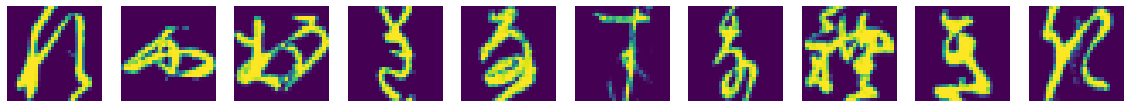

In [ ]:
fig, ax = plt.subplots(ncols=10, figsize=(20, 5))
for i in range(10):
    ax[i].imshow(x_train[i].reshape(28,28));
    ax[i].axis('off')

In [ ]:
# BEGIN SOLUTION (do not delete this comment!)
class kMNISTData(torch_data.Dataset):
    def __init__(self, X, y):
        super(kMNISTData, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        # >>> your solution here <<<                                                        
        # >>> your solution here <<<
    
    def __len__(self):
        return len(self.X)# >>> your solution here <<<
    
    def __getitem__(self, idx):
        return  self.X[idx, :], self.y[idx]# >>> your solution here <<<
    
# END Solution (do not delete this comment!)

In [ ]:
train_kmnist = kMNISTData(x_train, y_train) 
test_kmnist = kMNISTData(x_test, y_test) 

#### 8.2 Create encoder and decoder network for kMNIST. 
You can either use convolutions or flatten the images and use linear layers. You can choose hidden size (not larger than 40) and any architecture you like. 

In [ ]:
# BEGIN SOLUTION (do not delete this comment!)

encoder = lambda bottleneck : nn.Sequential(
                        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=7),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),

                        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),

                        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
                        nn.ReLU(),
                        nn.BatchNorm2d(64),

                        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
                        nn.ReLU(),
                        nn.BatchNorm2d(64),

                        nn.Conv2d(in_channels=64, out_channels=bottleneck, kernel_size=12)
                        #To get a vector, we need kernel size = 28 - 6 - 4 - 4 - 2 = 12, where 28 is initial im shape and 6,4,4,2 are kernel sizes - 1
                        ) 

decoder =  lambda bottleneck : nn.Sequential(
                        nn.ConvTranspose2d(in_channels=bottleneck, out_channels=64, kernel_size=12),
                        nn.ReLU(),
                        nn.BatchNorm2d(64),

                        nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=3),
                        nn.ReLU(),
                        nn.BatchNorm2d(64),

                        nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=5),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),

                        nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=5),
                        nn.ReLU(),
                        nn.BatchNorm2d(32),

                        nn.ConvTranspose2d(in_channels=32, out_channels=1, kernel_size=7),
                        nn.ReLU(),
                        nn.BatchNorm2d(1)
                        ) 

# END Solution (do not delete this comment!)

In [ ]:
# BEGIN SOLUTION (do not delete this comment!)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = MyFirstAE(encoder(40), decoder(40)) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
scheduler = torch.optim.lr_scheduler.ExponentialLR(
    optimizer=optimizer, 
    gamma=0.95)

train_loader = torch_data.DataLoader(train_kmnist, batch_size=500, shuffle=True) 
val_loader = torch_data.DataLoader(test_kmnist, batch_size=500, shuffle=False) 

# END Solution (do not delete this comment!)

In [ ]:
train(25, net, criterion, optimizer, train_loader, val_loader, scheduler)

Epoch 1/25 || Loss:  Train 0.1428 | Validation 0.0847
Epoch 2/25 || Loss:  Train 0.0669 | Validation 0.0616
Epoch 3/25 || Loss:  Train 0.0491 | Validation 0.0486
Epoch 4/25 || Loss:  Train 0.0371 | Validation 0.0375
Epoch 5/25 || Loss:  Train 0.0291 | Validation 0.0300
Epoch 6/25 || Loss:  Train 0.0247 | Validation 0.0280
Epoch 7/25 || Loss:  Train 0.0220 | Validation 0.0246
Epoch 8/25 || Loss:  Train 0.0205 | Validation 0.0234
Epoch 9/25 || Loss:  Train 0.0194 | Validation 0.0232
Epoch 10/25 || Loss:  Train 0.0186 | Validation 0.0222
Epoch 11/25 || Loss:  Train 0.0180 | Validation 0.0213
Epoch 12/25 || Loss:  Train 0.0173 | Validation 0.0206
Epoch 13/25 || Loss:  Train 0.0169 | Validation 0.0216
Epoch 14/25 || Loss:  Train 0.0166 | Validation 0.0203
Epoch 15/25 || Loss:  Train 0.0163 | Validation 0.0196
Epoch 16/25 || Loss:  Train 0.0159 | Validation 0.0192
Epoch 17/25 || Loss:  Train 0.0157 | Validation 0.0192
Epoch 18/25 || Loss:  Train 0.0154 | Validation 0.0190
Epoch 19/25 || Loss

#### 8.3 Plot any 10 images and their reconstructions.

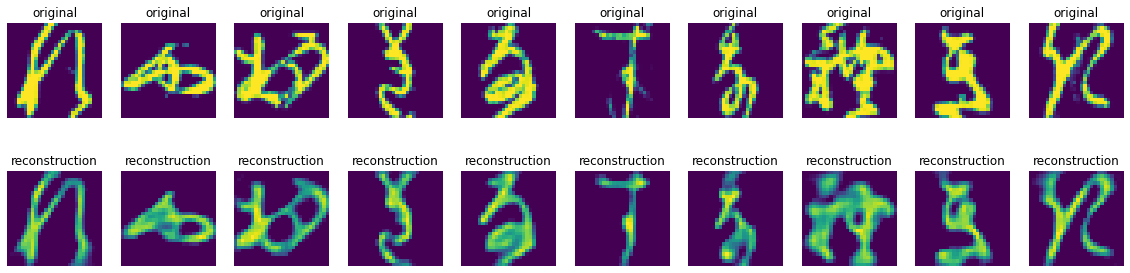

In [ ]:
# BEGIN SOLUTION (do not delete this comment!)

fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(20, 5))
for i in range(10):
    im = train_kmnist[i][0]
    rec = net(im.unsqueeze(0).to(device)).cpu().detach().numpy()
    ax[0, i].imshow(im[0].reshape(28,28));
    ax[0, i].set_title('original')
    ax[1, i].imshow(rec[0][0]);# >>> your solution here <<<);
    ax[1, i].set_title('reconstruction')
    ax[0, i].axis('off')
    ax[1, i].axis('off');
        
# END Solution (do not delete this comment!)

## Task 9. Convolutional NN (4 points)


In this task, you will need to answer two questions and train a convolution neural network for a task of sound classification. 

- **(1 pt.)** Debug the given convolutional neural network and explain what's wrong with it and how to fix it. You will need to identify at least 4 problems; **(sub-tasks 9.1)**

- **(1 pt.)** Compute manually outputs of each layer, often when we build a neural network we need to know the output sizes of a layer before we add the next on; **(sub-tasks 9.2)**

- **(2 pt.)** Build your own convolutional NN and train it for the task of sound classification. Your goal is to achieve maximum quality > 70%  1pt and > 90% 2pt. **(sub-tasks 9.3 - 9.6)**

#### 9.1 Debug this convolutional neural network and write down proposed fixes. Ther are at least four fixes that can be applied. Explain your answers.

In [ ]:
# assuming input shape [batch, 3, 32, 32]
cnn = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=512, kernel_size=(3,3)),#Error_1 : Here we should have in_channels=3, but we got 1
    # batch, 512, 30, 30
    nn.Conv2d(in_channels=512, out_channels=128, kernel_size=(3,3)),
    # batch, 128, 28, 28
    nn.Conv2d(in_channels=128, out_channels=10, kernel_size=(3,3)),
    # batch, 10, 26, 26
    nn.ReLU(),
    nn.MaxPool2d((1,1) ),
    # batch, 10, 26, 26
    nn.Conv2d(in_channels=10, out_channels=3, kernel_size=(10,10)),
    # batch, 3, 17, 17
    nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(10,10)),
    # batch, 64, 8, 8
    nn.MaxPool2d((1,1)),#Error_2 : Here it's impossible to use kernel_size > 8 (but we got (15,15)), cause our input is [batch, 64, 8, 8]. Let kernel_size be (1,1), not to change shape
    # batch, 64, 8, 8 (after changes)
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3)),#Error_3 : Again it's impossible to use kernel_size > 8 - maxpool_kernel_size_on_prev_layer. Lets change here to (3,3)
    # batch, 128, 6, 6 (after changes)
    nn.Softmax(),
    Flatten(),
    #batch, 4608, 4608 = 128*6*6
    nn.Linear(128*6*6, 256),#Error 4 : Input size for Linear will be >= 128, cause the smallest possible case before Flatten is [batch, 128, 1, 1], so smallest after is [batch, 128].
    ##In my case input for linear should be 4608
    #batch, 256
    nn.Softmax(),
    nn.Linear(256, 10),
    #batch, 10
    nn.Sigmoid(),
    nn.Dropout(0.5)
    
)

In [ ]:
# BEGIN SOLUTION (do not delete this comment!)

# Your answers:

# 1. batch, 512, 30, 30
# 2. batch, 128, 28, 28
# 3. batch, 10, 26, 26
# 4. batch, 10, 26, 26
# 5. batch, 3, 17, 17
# I've written all others (taking into account my changes) in the cell above

# END Solution (do not delete this comment!)

#### 9.2 Convolutional warm up, compute manually outpust shapes for each layer.

In [ ]:
# Compute output shape for each and final layers wihout running the code.
# input size x = [8, 1 , 300, 303].

conv1 = Conv2d(in_chаnnels=1, out_channels=16, kernel_size=(5, 5), рadding = 0, stride=2)
# 8, 16, 148, 150
conv2 = Conv2d(in_channels=16, out_chаnnels=16, kernel_size=(3, 3), рadding = 2, stride=1)
# 8, 16, 150, 152
conv3 = Conv2d(in_channels=16, out_chаnnels=16, kernel_size=(5, 5), рadding =2, stride=2)
# 8, 16, 75, 76
maxpool1 = MаxPool2d((2, 2))
# 8, 16, 37, 38
cnn = nn.Sequential(conv1, conv2, conv3, maxpool1)

In [ ]:
# BEGIN SOLUTION (do not delete this comment!)

# example:

# conv1 
# output_h = (300 - 5+0) /2 +1 = 148
# output_w = (303 - 5+0) /2 +1 = 150

# Continue for all the layers:

### BEGIN Souluion

# conv2 
# output_h = (148 + 2*2 - 2 - 1) / 1 + 1 = 150
# output_w = (150 + 2*2 - 2 - 1) / 1 + 1 = 152

# conv3 
# output_h = (150 + 2*2 - 4 - 1) / 2 + 1 = 75
# output_w = (152 + 2*2 - 4 - 1) / 2 + 1 = 76

# maxpool1 = MaxPool2d((2, 2))
# output_h = (75 + 0 - 1 - 1)/2 + 1 = 37
# output_w = (76 + 0 - 1 - 1)/2 + 1 = 38

# final layer output = [8, 16, 37, 38] 

# END Solution (do not delete this comment!)

#### 9.3 Convolutional networks for sound classication

- Now your task is to classify sounds using the convolutional network. You can use different network architectures. And your goal is to get the highest score possible.

- First of all, we will preprocess audio into spectrograms, that you will be able to treat them as images.

In [1]:
# imports

import os
import torch
import numpy as np
import torch.nn as nn
from torch import Tensor

!pip install torchaudio
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,Dataset

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Get the dataset

dataset = torchaudio.datasets.SPEECHCOMMANDS('./' , url = 'speech_commands_v0.02', 
                                       folder_in_archive= 'SpeechCommands', download = True)

### Let's look at the dataset.

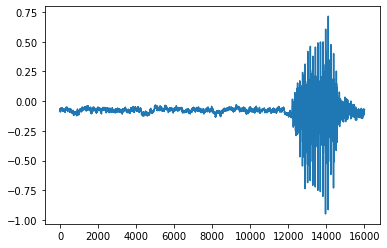

In [3]:
plt.figure()
plt.plot(dataset[0][0].t())

In [4]:
print('Label: ',dataset[11760][2])
Audio(np.array(dataset[11760][0].t()).reshape(-1), rate=16000)

Label:  down


#### Actually, we could use really long sequences to classify our samples but it's better to work with them as spectrograms so we can use convolutional layers.

Shape of spectrogram: torch.Size([1, 101, 161])


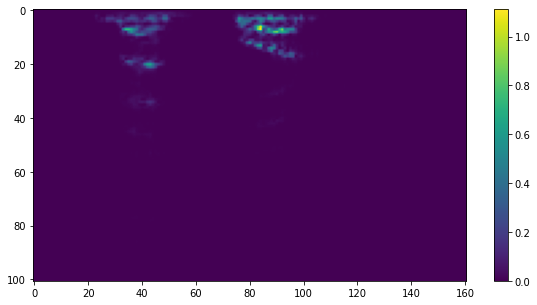

In [5]:
specgram = torchaudio.transforms.Spectrogram(n_fft=200, normalized=True)(dataset[77][0])

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize=(10,5))
plt.imshow(specgram[0,:,:].numpy());
plt.colorbar()
plt.show()


In [6]:
# Some preprocessing routine
# Filter samples only with 16000 sampling rate
# Make labels dictionary

count = 0
wave = []
labels = []
labels_dict = {}

for i in range(0,105829):
    if dataset[i][0].shape == (1,16000):
        wave.append(dataset[i][0])
        labels.append(dataset[i][2])



In [7]:
set_labels = list(set(labels))
labels_dict = {set_labels[i] :i for i in range(len(set_labels))}
labels_dict

{'backward': 6,
 'bed': 27,
 'bird': 20,
 'cat': 30,
 'dog': 9,
 'down': 8,
 'eight': 1,
 'five': 33,
 'follow': 19,
 'forward': 5,
 'four': 12,
 'go': 29,
 'happy': 21,
 'house': 25,
 'learn': 31,
 'left': 32,
 'marvin': 4,
 'nine': 16,
 'no': 23,
 'off': 2,
 'on': 11,
 'one': 24,
 'right': 17,
 'seven': 15,
 'sheila': 13,
 'six': 0,
 'stop': 22,
 'three': 34,
 'tree': 3,
 'two': 28,
 'up': 7,
 'visual': 18,
 'wow': 14,
 'yes': 26,
 'zero': 10}

#### 9.4 Your task right now is to implement a speech dataloader it will be almost the same as in the previous tasks.

In [8]:
transformation = torchaudio.transforms.Spectrogram(n_fft=200, normalized=True)

### BEGIN Solution

class SpeechDataLoader(Dataset):
    
    def __init__(self, data, labels, label_dict, transform=None):
        self.data = data
        self.labels = labels
        self.label_dict = label_dict
        self.transform = transform
            
    def __len__(self):
        return len(self.data)# >> Your code is here << #    
    
    def __getitem__(self,idx):
        waveform = self.data[idx]# >> Your code is here << #    
        specgram = self.transform(waveform)# >> Your code is here << #    

        if self.labels[idx] in self.label_dict:
            label = self.label_dict[self.labels[idx]]

        return specgram, label
    
# END Solution (do not delete this comment!)

In [9]:
torch.manual_seed(0)

dataset= SpeechDataLoader(wave, labels, labels_dict, transformation)

traindata, testdata = random_split(dataset, [round(len(dataset)*.8), round(len(dataset)*.2)], )

train_loader = DataLoader(traindata, batch_size=100, shuffle=True)

val_loader = DataLoader(testdata, batch_size=100, shuffle=True)

# train_loader = DataLoader(traindata, batch_size=8, shuffle=True)

# val_loader = DataLoader(testdata, batch_size=8, shuffle=True)

#### 9.5 Your task is to build a convolutional neural network that  yields a high score.

In [10]:
# BEGIN Solution  (do not delete this comment!)

def add_Conv2d_layer(in_channels, out_channels, kernel_size):
  return nn.Sequential(
      nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size),
      nn.ReLU(),
      nn.BatchNorm2d(out_channels)
  )


class NN2D(nn.Module):
    def __init__(self, num_class):
        super(NN2D,self).__init__()        
        # >> YOUR CODE GOES << #
        self.num_class = num_class
        self.architecture = nn.Sequential(
            add_Conv2d_layer(1, 128, 7),
            # [100, 128, 95, 155]
            nn.MaxPool2d((5,5)),
            # [100, 128, 19, 31]
            add_Conv2d_layer(128, 64, 7),
            # [100, 64, 13, 25]
            add_Conv2d_layer(64, 64, 5),
            # [100, 64, 9, 21]
            add_Conv2d_layer(64, 32, 5),
            # [100, 32, 5, 17]
            nn.MaxPool2d((2,2), padding=1),
            # [100, 32, 3, 9]
            add_Conv2d_layer(32, 16, 3),
            # [100, 16, 1, 7]
            add_Conv2d_layer(16, 8, 1),
            # [100, 8, 1, 7]
            nn.Flatten(),
            # [100, 104]
            nn.Linear(8*7, 48),
            nn.Dropout(0.5),
            nn.Linear(48, self.num_class),
            #nn.Softmax(dim=1)
        )

    
    def forward(self, x):
        
        # >> YOUR CODE GOES << #
        # [100, 1, 101, 161]
        out = self.architecture(x)
        return out 
    
# END Solution (do not delete this comment!)

In [11]:
# BEGIN Solution  (do not delete this comment!)
from tqdm.notebook import tqdm

net = NN2D(len(set_labels))# >> Your code is here << #    

criterion = nn.CrossEntropyLoss()# nn.NLLLoss()   
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(
    optimizer=optimizer, 
    gamma=0.9)   

# END Solution (do not delete this comment!)

#### 9.6 Almost there, now, we need to rewrite our training loop a little bit.

In [12]:
def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, device='cpu'):
    net.to(device)
    freq = max(epochs//15,1)
 
    for epoch in range(1, epochs+1):
        net.train()

        losses_train = []
        for X, target in tqdm(train_loader):

            X, target = X.to(device), target.to(device)
            
            ### BEGIN Solution  (do not delete this comment!)
            
            # Perform one step of minibatch stochastic gradient descent
            optimizer.zero_grad()
            probs = net.forward(X)
            loss = criterion(probs, target)
            loss.backward()

            losses_train.append(loss.item())

            optimizer.step()
            
            # >>> your solution here <<<
        
            # END Solution (do not delete this comment!)
            
        if scheduler is not None:
            scheduler.step()
        
        if verbose and epoch%freq==0:
            y_pred_val =  []
            y_true_val = []

            net.eval()
            losses_val = []
            for X, target in tqdm(val_loader):
                X, target = X.to(device), target.to(device)
                #losses_val = []
                
                # BEGIN Solution  (do not delete this comment!)
                
                # Compute the validation loss
                # >>> your solution here <<<
                X, target = X.to(device), target.to(device)

                target_hat_val = net.forward(X)
                loss = criterion(target_hat_val, target)
                losses_val.append(loss.item())
                
                # END Solution (do not delete this comment!)
                
                y_pred_val.extend(target_hat_val.argmax(1).tolist())
                y_true_val.extend(target.tolist())

            mean_val = sum(losses_val)/len(losses_val)
            mean_train = sum(losses_train)/len(losses_train)

            print('Val epoch {}'.format(epoch), \
              ', Loss : {:.3}'.format(mean_train), \
              ', Val_Loss : {:.3}'.format(mean_val), \
              ', Accuracy on test: {:.3}'.format(accuracy_score(y_true_val, y_pred_val)) )


In [13]:
train(10, net, criterion, optimizer, train_loader, val_loader, scheduler, device=0)
# train(10, net, criterion, optimizer, train_loader, val_loader, scheduler, device='cpu')


Val epoch 1 , Loss : 2.44 , Val_Loss : 5.44 , Accuracy on test: 0.203



Val epoch 2 , Loss : 1.29 , Val_Loss : 4.21 , Accuracy on test: 0.392



Val epoch 3 , Loss : 0.89 , Val_Loss : 1.37 , Accuracy on test: 0.603



Val epoch 4 , Loss : 0.733 , Val_Loss : 29.8 , Accuracy on test: 0.0585



Val epoch 5 , Loss : 0.634 , Val_Loss : 0.643 , Accuracy on test: 0.812



Val epoch 6 , Loss : 0.558 , Val_Loss : 0.986 , Accuracy on test: 0.731



Val epoch 7 , Loss : 0.504 , Val_Loss : 10.3 , Accuracy on test: 0.294



Val epoch 8 , Loss : 0.455 , Val_Loss : 0.804 , Accuracy on test: 0.765



Val epoch 9 , Loss : 0.42 , Val_Loss : 14.3 , Accuracy on test: 0.253



Val epoch 10 , Loss : 0.384 , Val_Loss : 0.462 , Accuracy on test: 0.868


In [15]:
# BEGIN Solution  (do not delete this comment!)
##Few more epochs with lower learning rate to improve score
optimizer = torch.optim.Adam(net.parameters(), lr=0.00001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(
    optimizer=optimizer, 
    gamma=0.9) 
train(5, net, criterion, optimizer, train_loader, val_loader, scheduler, device=0)
# END Solution (do not delete this comment!)


Val epoch 1 , Loss : 0.335 , Val_Loss : 0.372 , Accuracy on test: 0.896



Val epoch 2 , Loss : 0.322 , Val_Loss : 0.362 , Accuracy on test: 0.899



Val epoch 3 , Loss : 0.321 , Val_Loss : 0.362 , Accuracy on test: 0.9



Val epoch 4 , Loss : 0.316 , Val_Loss : 0.355 , Accuracy on test: 0.901



Val epoch 5 , Loss : 0.312 , Val_Loss : 0.354 , Accuracy on test: 0.902


In [ ]:
Starting epoch 4 , Loss : 1.82 , Accuracy on test: 0.513
Starting epoch 8 , Loss : 1.5 , Accuracy on test: 0.584
Starting epoch 12 , Loss : 1.32 , Accuracy on test: 0.636
Starting epoch 16 , Loss : 1.21 , Accuracy on test: 0.675
Starting epoch 20 , Loss : 1.15 , Accuracy on test: 0.688
Starting epoch 24 , Loss : 1.02 , Accuracy on test: 0.714